In [28]:
%reset -f

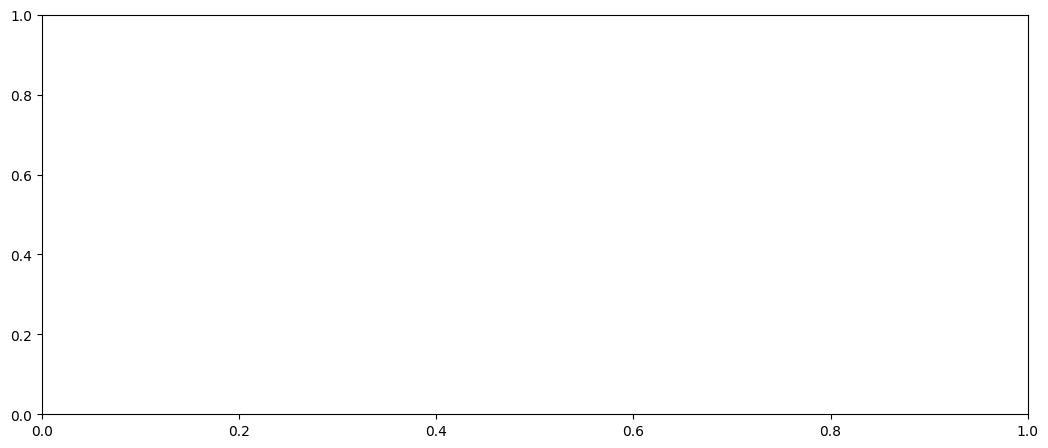

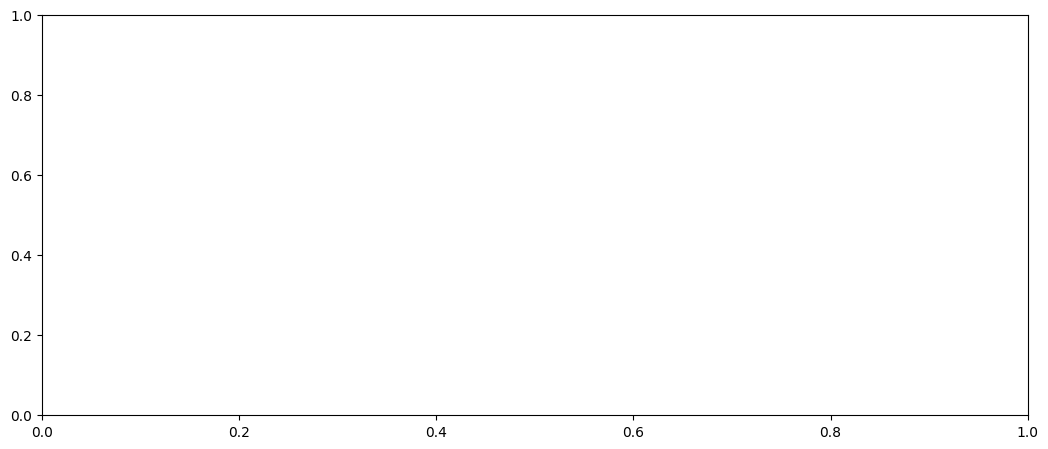

In [6]:
import wx
import numpy as np
import threading
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas
import pickle
import sys

class VariableDialog(wx.Dialog):
    def __init__(self, parent):
        super(VariableDialog, self).__init__(parent, title="變數修改")

        # 創建對話框的佈局
        sizer = wx.BoxSizer(wx.VERTICAL)

        # 添加變數的輸入欄位
        self.text_ctrls = {}
        variable_names = ['FirstThreshold', 'SecondThreshold', 'Markup1', 'Markup2', 'Speedup1', 'Speedup2']
        
        for var_name in variable_names:
            sizer.Add(wx.StaticText(self, label=f"{var_name}:"), 0, wx.ALL, 5)
            text_ctrl = wx.TextCtrl(self)  # 不顯示當前值，留空
            sizer.Add(text_ctrl, 0, wx.ALL | wx.EXPAND, 5)
            self.text_ctrls[var_name] = text_ctrl  # 保存輸入框

        # 添加「確定」和「取消」按鈕
        btn_sizer = self.CreateButtonSizer(wx.OK | wx.CANCEL)
        sizer.Add(btn_sizer, 0, wx.ALL | wx.ALIGN_CENTER, 10)

        self.SetSizer(sizer)
        self.Fit()
    def get_updated_variables(self):
        """獲取用戶輸入的變數"""
        updated_vars = {}
        for var_name, text_ctrl in self.text_ctrls.items():
            updated_vars[var_name] = text_ctrl.GetValue()  # 獲取輸入框中的值
        return updated_vars

class CleanDialog(wx.Dialog):
    def __init__(self, parent, frame):
        super(CleanDialog, self).__init__(parent, title="清除變數")
        self.frame = frame # 保存 frame 的引用

        # 創建對話框的佈局
        sizer = wx.BoxSizer(wx.VERTICAL)

        clean_button = wx.Button(self, label="清除所有變數")
        sizer.Add(clean_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.clean_all, clean_button)

        clean_FirstThreshold_button = wx.Button(self, label="清除上門檻")
        sizer.Add(clean_FirstThreshold_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.clean_FirstThreshold, clean_FirstThreshold_button)

        clean_SecondThreshold_button = wx.Button(self, label="清除下門檻")
        sizer.Add(clean_SecondThreshold_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.clean_SecondThreshold, clean_SecondThreshold_button)

        clean_Markup1_button = wx.Button(self, label="清除信號1")
        sizer.Add(clean_Markup1_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.clean_Markup1, clean_Markup1_button)

        clean_Markup2_button = wx.Button(self, label="清除信號2")
        sizer.Add(clean_Markup2_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.clean_Markup2, clean_Markup2_button)

        clean_Speedup1_button = wx.Button(self, label="清除加速值1")
        sizer.Add(clean_Speedup1_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.clean_Speedup1, clean_Speedup1_button)

        clean_Speedup2_button = wx.Button(self, label="清除加速值2")
        sizer.Add(clean_Speedup2_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.clean_Speedup2, clean_Speedup2_button)

        reset_outnumber_button = wx.Button(self, label="重置Outnumber")
        sizer.Add(reset_outnumber_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.reset_outnumber, reset_outnumber_button)

        self.SetSizer(sizer)
        self.Fit()


    def clean_FirstThreshold(self, event):
        if self.frame.should_read() and self.frame.RealPrice_data and self.frame.UpperLimit_data and self.frame.LowerLimit_data and self.frame.time_data:
            self.frame.update_plot()
            self.frame.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
            self.frame.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
            self.frame.init_data()
        self.frame.FirstThreshold = ''
        self.frame.check_variables()
        self.EndModal(wx.ID_OK)

    def clean_SecondThreshold(self, event):
        if self.frame.should_read() and self.frame.RealPrice_data and self.frame.UpperLimit_data and self.frame.LowerLimit_data and self.frame.time_data:
            self.frame.update_plot()
            self.frame.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
            self.frame.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
            self.frame.init_data()

        self.frame.SecondThreshold = ''
        self.frame.check_variables()
        self.EndModal(wx.ID_OK)

    def clean_Markup1(self, event):
        if self.frame.should_read() and self.frame.RealPrice_data and self.frame.UpperLimit_data and self.frame.LowerLimit_data and self.frame.time_data:
            self.frame.update_plot()
            self.frame.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
            self.frame.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
            self.frame.init_data()

        self.frame.Markup1 = ''
        self.frame.check_variables()
        self.EndModal(wx.ID_OK)

    def clean_Markup2(self, event):
        if self.frame.should_read() and self.frame.RealPrice_data and self.frame.UpperLimit_data and self.frame.LowerLimit_data and self.frame.time_data:
            self.frame.update_plot()
            self.frame.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
            self.frame.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
            self.frame.init_data()
        self.frame.Markup2 = ''
        self.frame.Markup3 = ''
        self.frame.Markup4 = ''
        self.frame.check_variables()
        self.EndModal(wx.ID_OK)

    def clean_Speedup1(self, event):
        if self.frame.should_read() and self.frame.RealPrice_data and self.frame.UpperLimit_data and self.frame.LowerLimit_data and self.frame.time_data:
            self.frame.update_plot()
            self.frame.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
            self.frame.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
            self.frame.init_data()

        self.frame.Speedup1 = ''
        self.frame.Markup3 = ''
        self.frame.check_variables()
        self.EndModal(wx.ID_OK)

    def clean_Speedup2(self, event):
        if self.frame.should_read() and self.frame.RealPrice_data and self.frame.UpperLimit_data and self.frame.LowerLimit_data and self.frame.time_data:
            self.frame.update_plot()
            self.frame.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
            self.frame.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
            self.frame.init_data()

        self.frame.Speedup2 = ''
        self.frame.Markup4 = ''
        self.frame.check_variables()
        self.EndModal(wx.ID_OK)

    def clean_all(self, event):
        if self.frame.should_read() and self.frame.RealPrice_data and self.frame.UpperLimit_data and self.frame.LowerLimit_data and self.frame.time_data:
            self.frame.update_plot()
            self.frame.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
            self.frame.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
            self.frame.init_data()

        self.frame.FirstThreshold = ''
        self.frame.SecondThreshold = ''
        self.frame.Markup1 = ''
        self.frame.Markup2 = ''
        self.frame.Markup3 = ''
        self.frame.Markup4 = ''
        self.frame.Speedup1 = ''
        self.frame.Speedup2 = ''
        self.frame.check_variables()
        self.EndModal(wx.ID_OK)  # 关闭对话框

    def reset_outnumber(self, event):
        self.frame.Outnumber = 0
        self.EndModal(wx.ID_OK)

class SituationDialog(wx.Dialog):
    def __init__(self, parent, frame):
        super(SituationDialog, self).__init__(parent, title="改變狀況")
        self.frame = frame # 保存 frame 的引用

        # 創建對話框的佈局
        sizer = wx.BoxSizer(wx.VERTICAL)

        change_non_speedup_button = wx.Button(self, label="沒有加速")
        sizer.Add(change_non_speedup_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.change_non_speedup, change_non_speedup_button)

        change_first_speedup_button = wx.Button(self, label="第一次加速")
        sizer.Add(change_first_speedup_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.change_first_speedup, change_first_speedup_button)

        change_second_speedup_button = wx.Button(self, label="第二次加速")
        sizer.Add(change_second_speedup_button, 1, wx.ALL | wx.EXPAND, 10)
        self.Bind(wx.EVT_BUTTON, self.change_negative, change_second_speedup_button)

        self.SetSizer(sizer)
        self.Fit()

    def change_non_speedup(self, event):
        self.frame.two_over_ten = False
        self.frame.three_over_ten = False
        self.EndModal(wx.ID_OK)

    def change_first_speedup(self, event):
        self.frame.two_over_ten = True
        self.frame.three_over_ten = False
        self.EndModal(wx.ID_OK)

    def change_negative(self, event):
        self.frame.three_over_ten = True
        self.frame.two_over_ten = False
        self.EndModal(wx.ID_OK)


class MyFrame(wx.Frame):
    def __init__(self, *args, **kwargs):
        super(MyFrame, self).__init__(*args, **kwargs)
        # frame 的基本設定
        self.SetDoubleBuffered(True)
        
        self.two_over_ten = False
        self.three_over_ten = False
        self.is_positive = False
        self.is_negative = False
        self.limit_times = []

        try :
            self.RealPrice_data
            self.UpperLimit_data
            self.LowerLimit_data
            self.time_data
        except AttributeError :
            self.init_data()

        variables = self.load_variables_from_pickle('variables.pkl')
        self.apply_variables_to_self(variables)
        self.program_start_time = datetime.datetime.now()
        self.check_variables()
        self.ini_ui()
        self.create_menu_bar()


    # 設定15點的時間點
        self.nine_am_today = self.program_start_time.replace(hour=1, minute=0, second=0, microsecond=0)


        if self.should_read() and self.RealPrice_data and self.UpperLimit_data and self.LowerLimit_data and self.time_data:
            self.update_plot()
            self.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
            self.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
            self.init_data()
        
        if self.program_start_time < self.nine_am_today:
        # 設置標記，表明在9點之前啟動
            self.before_nine_am = True
        else:
        # 在9點之後啟動
            self.before_nine_am = False


        self.check_condition()
        
        self.start_period_check()
        self.Maximize(True)
        self.Bind(wx.EVT_CLOSE, self.on_close)  # 綁定窗口關閉事件

    def on_close(self, event):
        self.save_variables_to_pickle('variables.pkl', self.extract_self_variables())
        self.Destroy()  # 先銷毀窗口
        #sys.exit()  # 然後退出程序pyinstaller --onefile --noconsole
 

    def save_variables_to_pickle(self, file_path, variables):
        with open(file_path, 'wb') as f:
            pickle.dump(variables, f)

    def extract_self_variables(self):
        variables = {}
        variable_names = [
            'FirstThreshold', 'SecondThreshold', 'Markup1', 'Markup2', 'Speedup1', 'Speedup2', 'Markup3', 'Markup4',
            'FilePath', 'SaveFilePath', 'Outnumber', 'RealPrice', 'NowPrice', 'UpperLimit', 'LowerLimit', 'Markup3',  
            'RealPrice_data', 'UpperLimit_data', 'LowerLimit_data'
            , 'two_over_ten', 'three_over_ten', 'limit_times', 'is_positive', 'is_negative', 'time_data'
        ]
        for var_name in variable_names:
            try:
                if hasattr(self, var_name):
                    variables[var_name] = getattr(self, var_name)
            except AttributeError:
                pass
        return variables

    def load_variables_from_pickle(self, file_path):
        try:
            with open(file_path, 'rb') as f:
                variables = pickle.load(f)
            return variables
        except FileNotFoundError:
            # 如果文件不存在，返回默認變數
            return {}
        except pickle.UnpicklingError:
            # 如果讀取錯誤，返回空字典
            return {}

    def apply_variables_to_self(self, variables):
        for var_name, value in variables.items():
            try:
                setattr(self, var_name, value)
            except AttributeError:
                pass

    def change_cal_var(self):
        self.RealPrice = float(np.loadtxt(self.FilePath))
        self.NowPrice = self.RealPrice
        if hasattr(self, 'FirstThreshold') and getattr(self, 'FirstThreshold') != "":
            self.UpperLimit = self.NowPrice + self.FirstThreshold
        if hasattr(self, 'SecondThreshold') and getattr(self, 'SecondThreshold') != "":
            self.LowerLimit = self.NowPrice - self.SecondThreshold

    def update_middle_sizer(self):
            # 更新時間
        if hasattr(self, 'current_time') and getattr(self, 'current_time') != "":
            wx.CallAfter(self.time_label.SetLabel, f"現在時間: {self.current_time.strftime('%m/%d %H:%M')}")

        # 更新及時台指期貨指數
        if hasattr(self, 'RealPrice') and getattr(self, 'RealPrice') != "":
            wx.CallAfter(self.index_label.SetLabel, f"即時台指期貨指數: {self.RealPrice}")
        else:
            wx.CallAfter(self.index_label.SetLabel, "尚未讀入資料")

        # 更新門檻及信號
        if hasattr(self, 'FirstThreshold') and getattr(self, 'FirstThreshold') != "" and hasattr(self, 'Markup1') and getattr(self, 'Markup1') != "":
            wx.CallAfter(self.upper_label.SetLabel, f"1. 當指數上漲{self.FirstThreshold}點時，開始作多。")
        else:
            wx.CallAfter(self.upper_label.SetLabel, "尚未輸入上門檻")

        if hasattr(self, 'SecondThreshold') and getattr(self, 'SecondThreshold') != "" and hasattr(self, 'Markup1') and getattr(self, 'Markup1') != "":
            wx.CallAfter(self.lower_label.SetLabel, f"2. 當指數下跌{self.SecondThreshold}點時，開始作空。")
        else:
            wx.CallAfter(self.lower_label.SetLabel, "尚未輸入下門檻")
        if hasattr(self, 'Markup1') and getattr(self, 'Markup1') != "" and hasattr(self, 'Markup2') and getattr(self, 'Markup2') != "":
            wx.CallAfter(self.markup_label.SetLabel, f"3. 此時信號1為{self.Markup1}，信號2為{self.Markup2}。")
        else:
            wx.CallAfter(self.markup_label.SetLabel, "尚未輸入信號1或信號2")
        # 更新加速
        if hasattr(self, 'Speedup1') and getattr(self, 'Speedup1') != "" and hasattr(self, 'Markup2') and getattr(self, 'Markup2') != "":
            wx.CallAfter(self.speedup1_label.SetLabel, f"4. 當10分鐘內2次向上(下)突破，作多信號加速{self.Speedup1}%。")
        else:
            wx.CallAfter(self.speedup1_label.SetLabel, "尚未輸入加速值1或信號2")

        if hasattr(self, 'Speedup2') and getattr(self, 'Speedup2') != "" and hasattr(self, 'Markup2') and getattr(self, 'Markup2') != "":
            wx.CallAfter(self.speedup2_label.SetLabel, f"5. 當10分鐘內3次向上(下)突破，作多信號加速{self.Speedup2}%。")
        else:
            wx.CallAfter(self.speedup2_label.SetLabel, "尚未輸入加速值2或信號2")

        if self.two_over_ten:
            wx.CallAfter(self.situation_label.SetLabel, "目前狀況: 進行第一次加速")
        elif self.three_over_ten:
            wx.CallAfter(self.situation_label.SetLabel, "目前狀況: 進行第二次加速")
        else:
            wx.CallAfter(self.situation_label.SetLabel, "目前狀況: 沒有加速")


        if hasattr(self, 'FilePath') and getattr(self, 'FilePath') != "":
            wx.CallAfter(self.save_label.SetLabel, f"指數txt檔位置: {self.FilePath}")
        else:
            wx.CallAfter(self.save_label.SetLabel, "尚未輸入檔案位置")
        if hasattr(self, 'SaveFilePath') and getattr(self, 'SaveFilePath') != "":
            wx.CallAfter(self.file_label.SetLabel, f"Out Number txt檔位置: {self.SaveFilePath}")
        else:
            wx.CallAfter(self.file_label.SetLabel, "尚未輸入存檔位置")
        wx.CallAfter(self.outnumber_label.SetLabel, f"Outnumber: {round(self.Outnumber, 2)}")

    def check_variables(self):
        # 判斷是否有所有變數均存在，若存在則讀檔並計算 outnumer

        self.all_variable_exist = True

        variable_names = [
            'FirstThreshold', 'SecondThreshold', 'Markup1', 
            'Markup2', 'FilePath', 'SaveFilePath', 'Outnumber', 'Speedup1', 'Speedup2', 'Markup3', 'Markup4', 
            'RealPrice', 'NowPrice', 'UpperLimit', 'LowerLimit'
        ]
        for var_name in variable_names:
            try:
                # 如果变量不存在或为空，标记为 False
                if not hasattr(self, var_name) or getattr(self, var_name) == "":
                    self.all_variable_exist = False
                    break
            except AttributeError:
                self.all_variable_exist = False
                break
        
        if not self.all_variable_exist:
            # 如果变量不存在或为空，初始化必要的变量
            self.Outnumber = 0
        

    def init_data(self):
        self.RealPrice_data = []
        self.UpperLimit_data = []
        self.LowerLimit_data = []
        self.time_data = []

    def update_data(self):
        self.RealPrice_data.append(self.RealPrice)
        self.UpperLimit_data.append(self.UpperLimit)
        self.LowerLimit_data.append(self.LowerLimit)
        self.time_data.append(self.current_time)
    
    def check_reset_time(self):
        if self.before_nine_am and self.current_time >= self.nine_am_today:
        # 清空數據，因為現在是9點或之後
            if self.RealPrice_data and self.UpperLimit_data and self.LowerLimit_data and self.time_data:
                self.update_plot()
                self.figure_today.savefig('old_plot_day.png', bbox_inches='tight', dpi = 300)
                self.figure_hour.savefig('old_plot_hour.png', bbox_inches='tight', dpi = 300)
                self.Outnumber = 0
                self.two_over_ten = False
                self.three_over_ten = False
                self.init_data()  # 重新初始化數據
            self.before_nine_am = False  # 重置標記，後續不再需要清空數據
        if self.nine_am_today.day != self.current_time.day and self.current_time.hour < 1:
            self.nine_am_today = self.current_time.replace(hour = 1, minute=0, second=0, microsecond=0)
            self.before_nine_am = True

    def update_plot(self):
        # 更新今天的圖表
        if self.RealPrice_data and self.UpperLimit_data and self.LowerLimit_data:
            self.ax_today.clear()

            latest_real_price = self.RealPrice_data[-1]
            latest_upper_limit = self.UpperLimit_data[-1]
            latest_lower_limit = self.LowerLimit_data[-1]
            self.ax_today.plot(self.time_data, self.UpperLimit_data, label=f'Upper Limit: {latest_upper_limit:.2f}', color='red', linestyle='--')
            self.ax_today.plot(self.time_data, self.RealPrice_data, label=f'Real Price: {latest_real_price:.2f}', color='black')
            self.ax_today.plot(self.time_data, self.LowerLimit_data, label=f'Lower Limit: {latest_lower_limit:.2f}', color='blue', linestyle='--')
            self.ax_today.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 30]))
            self.ax_today.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
            if self.time_data:  # 確保 self.time_data 有數據
                self.ax_today.set_xlim([self.time_data[0], self.time_data[-1]])
            self.ax_today.spines['right'].set_visible(False)
            self.ax_today.spines['top'].set_visible(False)
            self.ax_today.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            self.figure_today.autofmt_xdate()
            self.figure_today.tight_layout()
            self.canvas_today.draw()

            self.ax_hour.clear()

            # 更新圖表並在圖例中顯示最新值

            if len(self.time_data) > 3600:
                self.ax_hour.plot(self.time_data[-3600:], self.UpperLimit_data[-3600:], label=f'Upper Limit: {latest_upper_limit:.2f}', color='red', linestyle='--')
                self.ax_hour.plot(self.time_data[-3600:], self.RealPrice_data[-3600:], label=f'Real Price: {latest_real_price:.2f}', color='black')
                self.ax_hour.plot(self.time_data[-3600:], self.LowerLimit_data[-3600:], label=f'Lower Limit: {latest_lower_limit:.2f}', color='blue', linestyle='--')
            else:
                self.ax_hour.plot(self.time_data, self.UpperLimit_data, label=f'Upper Limit: {latest_upper_limit:.2f}', color='red', linestyle='--')
                self.ax_hour.plot(self.time_data, self.RealPrice_data, label=f'Real Price: {latest_real_price:.2f}', color='black')
                self.ax_hour.plot(self.time_data, self.LowerLimit_data, label=f'Lower Limit: {latest_lower_limit:.2f}', color='blue', linestyle='--')
            self.ax_hour.xaxis.set_major_locator(mdates.MinuteLocator(interval = 10))
            self.ax_hour.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
            if self.time_data: 
                self.ax_hour.set_xlim([self.time_data[0], self.time_data[-1]])
            self.ax_hour.spines['right'].set_visible(False)
            self.ax_hour.spines['top'].set_visible(False)

            # 圖例放在圖形外面
            self.ax_hour.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            self.figure_hour.autofmt_xdate()
            self.figure_hour.tight_layout()
            self.canvas_hour.draw()
    def ini_ui(self):
        font = wx.Font(20, wx.FONTFAMILY_DEFAULT, wx.FONTSTYLE_NORMAL, wx.FONTWEIGHT_NORMAL)
        # 创建一个面板
        self.panel = wx.Panel(self)
        self.panel.SetBackgroundColour('white')  # 設置整個程式背景為白色
        self.middle_panel = wx.ScrolledWindow(self.panel, -1, style=wx.VSCROLL)
        self.middle_panel.SetScrollbars(20, 20, 50, 50)
        self.right_panel = wx.Panel(self.panel, -1)
        self.figure_today = plt.figure(figsize=(6, 4))
        self.ax_today = self.figure_today.add_subplot(111)
        self.figure_today.tight_layout()

        self.figure_hour = plt.figure(figsize=(6, 4))
        self.ax_hour = self.figure_hour.add_subplot(111)
        self.figure_hour.tight_layout()

        self.canvas_today = FigureCanvas(self.right_panel, -1, self.figure_today)
        self.canvas_hour = FigureCanvas(self.right_panel, -1, self.figure_hour)

        self.right_sizer = wx.BoxSizer(wx.VERTICAL)
        self.right_sizer.Add(self.canvas_today, 1,  wx.EXPAND | wx.ALL, 10)
        self.right_sizer.Add(self.canvas_hour, 1,  wx.EXPAND | wx.ALL, 10)
        self.right_panel.SetSizer(self.right_sizer)

        self.middle_sizer = wx.BoxSizer(wx.VERTICAL)
        #self.middle_sizer = wx.WrapSizer(wx.VERTICAL)
        self.time_label = wx.StaticText(self.middle_panel, label="現在時間:")
        self.index_label = wx.StaticText(self.middle_panel, label="尚未讀入資料")
        self.upper_label = wx.StaticText(self.middle_panel, label="尚未輸入上門檻")
        self.lower_label = wx.StaticText(self.middle_panel, label="尚未輸入下門檻")
        self.markup_label = wx.StaticText(self.middle_panel, label="尚未輸入信號1或信號2")
        self.speedup1_label = wx.StaticText(self.middle_panel, label="尚未輸入加速值1或信號2")
        self.speedup2_label = wx.StaticText(self.middle_panel, label="尚未輸入加速值2或信號2")
        self.situation_label = wx.StaticText(self.middle_panel, label="目前狀況: 尚未進行計算")
        self.save_label = wx.StaticText(self.middle_panel, label="尚未輸入檔案位置")
        self.file_label = wx.StaticText(self.middle_panel, label="尚未輸入存檔位置")
        self.outnumber_label = wx.StaticText(self.middle_panel, label=f"Outnumber: {self.Outnumber}")

        self.middle_sizer.Add(self.time_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.index_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.upper_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.lower_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.markup_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.speedup1_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.speedup2_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.situation_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.save_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.file_label, 0, wx.ALL, 10)
        self.middle_sizer.Add(self.outnumber_label, 0, wx.ALL, 10)

        self.time_label.SetFont(font)
        self.index_label.SetFont(font)
        self.upper_label.SetFont(font)
        self.lower_label.SetFont(font)
        self.markup_label.SetFont(font)
        self.speedup1_label.SetFont(font)
        self.speedup2_label.SetFont(font)
        self.situation_label.SetFont(font)
        self.save_label.SetFont(font)
        self.file_label.SetFont(font)
        self.outnumber_label.SetFont(font)

        self.update_middle_sizer()
        self.middle_panel.SetSizer(self.middle_sizer)
        self.middle_panel.SetScrollRate(5, 5)
        self.middle_panel.Layout()



        sizer = wx.BoxSizer(wx.HORIZONTAL)
        sizer.Add(self.middle_panel, 2, wx.ALL | wx.EXPAND, 5)
        sizer.Add(self.right_panel, 3, wx.ALL | wx.EXPAND, 5)
        self.panel.SetSizer(sizer)

        self.Centre()
        self.Show(True)
        self.Fit()

    # 確定所有變數均存在且在交易時間內

    def check_condition(self):
        self.check_reset_time()
        # self.check_variables()
        if self.all_variable_exist and self.should_read() :
            self.Calculate()
            self.update_data()
        if self.all_variable_exist:
            self.update_plot()
        self.update_middle_sizer()
    # 每秒檢查一次是否有變數變動，且為守護執行緒

    def start_period_check(self):
        thread = threading.Thread(target = self.period_check)
        thread.daemon = True
        thread.start()

    # 每秒檢查一次是否在交易時間且變數是否有缺失，並且確保執行時間為整秒

    def period_check(self):
        while True :
            self.current_time = datetime.datetime.now()
            wx.CallAfter(self.check_condition)
    
            # 计算下次执行的时间点
            next_time = self.current_time + datetime.timedelta(seconds = 1)
            next_time = next_time.replace(microsecond=0)
            
            # 计算休眠时间
            sleep_duration = (next_time - self.current_time).total_seconds()
            
            time.sleep(sleep_duration)
    def create_menu_bar(self):
        # 創建選單列
        menu_bar = wx.MenuBar()
        
        # 創建「檔案」選單
        file_menu = wx.Menu()
        
        # 創建「設定」選項
        option_menu = wx.Menu()
        
        # 添加「開啟舊檔」選項
        open_file_item = file_menu.Append(wx.ID_OPEN, "開啟舊檔\tCtrl+O", "開啟一個檔案")
        self.Bind(wx.EVT_MENU, self.on_open_file, open_file_item)
        
        # 添加「儲存檔案」選項
        save_file_item = file_menu.Append(wx.ID_SAVE, "儲存檔案\tCtrl+S", "儲存檔案")
        self.Bind(wx.EVT_MENU, self.on_save_file, save_file_item)


        save_today_plot_item = file_menu.Append(wx.ID_ANY, "保存今日圖表", "保存今日圖表")
        self.Bind(wx.EVT_MENU, self.on_save_today_plot, save_today_plot_item)

        save_hour_plot_item = file_menu.Append(wx.ID_ANY, "保存小時圖表", "保存小時圖表")
        self.Bind(wx.EVT_MENU, self.on_save_hour_plot, save_hour_plot_item)
        # 添加「變數改變」選項
        change_var_item = option_menu.Append(wx.ID_ANY, "變數改變", "修改變數值")
        self.Bind(wx.EVT_MENU, self.on_change_var, change_var_item)

        clean_file_item = option_menu.Append(wx.ID_ANY, "清除變數", "清除變數")
        self.Bind(wx.EVT_MENU, self.on_clean_file, clean_file_item)

        change_situation_item = option_menu.Append(wx.ID_ANY, "改變狀況", "改變狀況")
        self.Bind(wx.EVT_MENU, self.on_change_situation, change_situation_item)

        menu_bar.Append(file_menu, "&檔案")
        menu_bar.Append(option_menu, "&設定")
        # 將選單列設置到框架中
        self.SetMenuBar(menu_bar)

    def on_clean_file(self, event):
        dialog = CleanDialog(self, self) # 傳入 frame 自身作為參數
        dialog.ShowModal()
        dialog.Destroy()

    def on_change_situation(self, event):
        dialog = SituationDialog(self, self)
        dialog.ShowModal()
        dialog.Destroy()    

    # 按鈕按下後改變變數
    def on_change_var(self, event):
        dialog = VariableDialog(self)
        if dialog.ShowModal() == wx.ID_OK:
            updated_vars = dialog.get_updated_variables()
            self.update_variables(updated_vars)
            self.change_cal_var()
            self.check_variables()    
        dialog.Destroy()

    def update_variables(self, updated_vars):
        for var_name, new_value in updated_vars.items():
            try:
                if new_value:
                    setattr(self, var_name, float(new_value))                
            except ValueError:
                pass  
        try:
            if hasattr(self, 'Markup2') and hasattr(self, 'Speedup1') and getattr(self, 'Markup2') != "" and getattr(self, 'Speedup1') != "":
                self.Markup3 = self.Markup2 * (1 + 0.01 * self.Speedup1)
            if hasattr(self, 'Markup3') and hasattr(self, 'Speedup2') and getattr(self, 'Markup3') != "" and getattr(self, 'Speedup2') != "":
                self.Markup4 = self.Markup3 * (1 + 0.01 * self.Speedup2)
        except AttributeError:
            pass
        self.update_middle_sizer()
        
    # 打開存檔，並將存檔路徑存入變數

    def on_open_file(self, event):
        with wx.FileDialog(self, wildcard="Text files (*.txt)|*.txt",
                           style=wx.FD_OPEN | wx.FD_FILE_MUST_EXIST) as file_dialog:
            if file_dialog.ShowModal() == wx.ID_OK:
                self.FilePath = file_dialog.GetPath()
                self.change_cal_var()
                self.check_variables()

    # 存取輸出，並將存檔路徑存入變數

    def on_save_file(self, event):
        with wx.FileDialog(self, "保存文件", wildcard="Text files (*.txt)|*.txt",
                           style=wx.FD_SAVE | wx.FD_OVERWRITE_PROMPT) as save_dialog:
            if save_dialog.ShowModal() == wx.ID_OK:
                self.SaveFilePath = save_dialog.GetPath()
                self.check_variables()
                np.savetxt(self.SaveFilePath, np.array([self.Outnumber]), fmt='%.2f')

    def on_save_today_plot(self, event):
        with wx.FileDialog(self, "保存文件", wildcard="PNG files (*.png)|*.png",
                           style=wx.FD_SAVE | wx.FD_OVERWRITE_PROMPT) as save_dialog:
            if save_dialog.ShowModal() == wx.ID_OK:
                if self.RealPrice_data and self.UpperLimit_data and self.LowerLimit_data and self.time_data:
                    self.update_plot()
                    save_plot_path = save_dialog.GetPath()
                    self.figure_today.savefig(save_plot_path, bbox_inches='tight', dpi = 300)
                else:
                    wx.MessageBox("尚未有圖形產生", "警告", wx.OK | wx.ICON_WARNING)

    def on_save_hour_plot(self, event):
        with wx.FileDialog(self, "保存文件", wildcard="PNG files (*.png)|*.png",
                           style=wx.FD_SAVE | wx.FD_OVERWRITE_PROMPT) as save_dialog:
            if save_dialog.ShowModal() == wx.ID_OK:
                if self.RealPrice_data and self.UpperLimit_data and self.LowerLimit_data and self.time_data:
                    self.update_plot()
                    save_plot_path = save_dialog.GetPath()
                    self.figure_hour.savefig(save_plot_path, bbox_inches='tight', dpi = 300)
                else:
                    wx.MessageBox("尚未有圖形產生", "警告", wx.OK | wx.ICON_WARNING)

    # 判斷是否在交易時間

    def should_read(self):
        self.current_time = datetime.datetime.now()
        start_time = self.current_time.replace(hour = 1, minute = 0, second = 0, microsecond = 0)
        end_time = self.current_time.replace(hour = 23, minute = 59, second = 59, microsecond = 0)
        return start_time <= self.current_time <= end_time
        
    # 計算 outnumber
    # 只有在Outnumber 大於等於/小於等於 0時才會開始紀錄十分鐘內突破的次數
    def Calculate(self):
        self.RealPrice = float(np.loadtxt(self.FilePath))
        if self.RealPrice > self.UpperLimit :
            if self.is_negative == False and self.is_positive == False :
                self.is_negative = True
                if self.Outnumber >= 0 :
                    self.limit_times = [t for t in self.limit_times if (self.current_time - t).total_seconds() <= 600]
                    self.limit_times.append(self.current_time)
            elif self.is_negative == True :
                self.limit_times = []
                self.is_positive = True
                self.is_negative = False
                self.two_over_ten = False
                self.three_over_ten = False
                if self.Outnumber >= 0 :
                    self.limit_times.append(self.current_time)
            else :
                if self.Outnumber >= 0 :
                    self.limit_times = [t for t in self.limit_times if (self.current_time - t).total_seconds() <= 600]
                    self.limit_times.append(self.current_time)
            if self.Outnumber < 0 :
                self.Outnumber = self.Outnumber + 3*self.Markup2
                if self.Outnumber >= 0 :
                    self.Outnumber = 0
            elif self.Outnumber < self.Markup1 :
                self.Outnumber = self.Markup1
            elif self.three_over_ten : 
                self.Outnumber = self.Outnumber + self.Markup4
            elif len(self.limit_times) >= 3 :
                self.three_over_ten = True
                self.two_over_ten = False
                self.Outnumber = self.Outnumber + self.Markup4
            elif self.two_over_ten :
                self.Outnumber = self.Outnumber + self.Markup3
            elif len(self.limit_times) == 2 :
                self.Outnumber = self.Outnumber + self.Markup2
                self.two_over_ten = True
            else :
                self.Outnumber = self.Outnumber + self.Markup2
            if self.Outnumber >= 99 :
                self.Outnumber = 99
                self.Outnumber = round(self.Outnumber, 2)
            np.savetxt(self.SaveFilePath, np.array([self.Outnumber]), fmt='%.2f')
            self.NowPrice = self.UpperLimit
            self.UpperLimit = self.NowPrice + self.FirstThreshold
            self.LowerLimit = self.NowPrice - 2*self.SecondThreshold
        elif self.RealPrice < self.LowerLimit :
            if self.is_negative == False and self.is_positive == False :
                self.is_negative = True
                if self.Outnumber <= 0 :
                    self.limit_times = [t for t in self.limit_times if (self.current_time - t).total_seconds() <= 600]
                    self.limit_times.append(self.current_time)
            elif self.is_positive == True :
                self.limit_times = []
                self.is_positive = False
                self.is_negative = True
                self.two_over_ten = False
                self.three_over_ten = False
                if self.Outnumber <= 0 :
                    self.limit_times.append(self.current_time)
            else :
                if self.Outnumber <= 0 :
                    self.limit_times = [t for t in self.limit_times if (self.current_time - t).total_seconds() <= 600]
                    self.limit_times.append(self.current_time)
            if self.Outnumber > 0 :
                self.Outnumber = self.Outnumber - 3*self.Markup2
                if self.Outnumber <= 0 :
                    self.Outnumber = 0
            elif self.Outnumber > -self.Markup1 :
                self.Outnumber = -self.Markup1
            elif self.three_over_ten :
                self.Outnumber = self.Outnumber - self.Markup4     
            elif len(self.limit_times) >= 3 :
                self.three_over_ten = True
                self.two_over_ten = False
                self.Outnumber = self.Outnumber - self.Markup4
            elif self.two_over_ten :
                self.Outnumber = self.Outnumber - self.Markup3
            elif len(self.limit_times) == 2 :
                self.Outnumber = self.Outnumber - self.Markup2
                self.two_over_ten = True
            else :
                self.Outnumber = self.Outnumber - self.Markup2
            if self.Outnumber <= -99 :
                self.Outnumber = -99
            np.savetxt(self.SaveFilePath, np.array([self.Outnumber]), fmt='%.2f')
            self.NowPrice = self.LowerLimit
            self.UpperLimit = self.NowPrice + 2*self.FirstThreshold
            self.LowerLimit = self.NowPrice - self.SecondThreshold    
class MyApp(wx.App):
    def OnInit(self):
        # 创建一个窗口框架
        frame = MyFrame(None)
        frame.Show(True)
        return True

# 启动应用程序
if __name__ == '__main__':
    app = MyApp()
    app.MainLoop()


In [13]:
import pickle

def read_pickle_file(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            print(data)  # 顯示 pkl 檔案內容
    except FileNotFoundError:
        print("文件未找到")
    except pickle.UnpicklingError:
        print("讀取 pkl 文件時出錯")

# 使用範例
read_pickle_file('variables.pkl')

{'FirstThreshold': 25.0, 'SecondThreshold': 25.0, 'Markup1': 15.0, 'Markup2': 3.0, 'Speedup1': 100.0, 'Speedup2': 100.0, 'Markup3': 6.0, 'Markup4': 12.0, 'FilePath': 'C:\\Users\\zxcv1\\OneDrive\\文件\\test.txt', 'SaveFilePath': 'C:\\Users\\zxcv1\\OneDrive\\文件\\test_out.txt', 'Outnumber': 0, 'RealPrice': 355.0, 'NowPrice': 355.0, 'UpperLimit': 380.0, 'LowerLimit': 330.0, 'RealPrice_data': [], 'UpperLimit_data': [], 'LowerLimit_data': [], 'two_over_ten': False, 'three_over_ten': False, 'limit_times': [], 'is_positive': False, 'is_negative': False, 'time_data': []}
